In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from sklearn.manifold import TSNE
import seaborn as sns


In [9]:
data = 'Cluster_DNNLayer_data_validation.csv'
df = pd.read_csv(data)
df = df.drop('Unnamed: 0',axis = 1)

In [44]:
accent = {0:'us', 1:'england', 2:'hongkong', 3:'indian', 4:'african', 5:'australia',
6:'newzealand', 7:'canada', 8:'scotland', 9:'ireland', 10:'philippines',
11:'wales', 12:'singapore', 13:'malaysia', 14:'other',15:'bermuda',16:'southatlandtic'}

In [48]:
df['Accent_Names'] = df['Accent'].apply(lambda x: accent[x])

In [49]:
df['CLuster_Names'] = df['Cluster'].apply(lambda x: accent[x])

In [50]:
df.head()

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat196,feat197,feat198,feat199,Accent,Cluster,tsne-2d-one,tsne-2d-two,Accent_Names,CLuster_Names
0,-0.09645,-0.109618,0.029819,0.219857,0.002492,0.171687,-0.049049,-0.17119,-0.035706,0.114049,...,-0.064517,-0.145078,0.180960,-0.312158,0,0,5.169917,-24.543619,us,us
1,-0.09645,-0.109618,0.029819,0.219857,0.002492,0.171687,-0.049049,-0.17119,-0.035706,0.114049,...,-0.064525,-0.145075,0.180962,-0.312157,7,0,-41.529682,6.747093,canada,us
2,-0.09645,-0.109618,0.029819,0.219857,0.002492,0.171687,-0.049049,-0.17119,-0.035706,0.114049,...,-0.064518,-0.145079,0.180960,-0.312158,7,0,-14.158619,7.764418,canada,us
3,-0.09645,-0.109618,0.029819,0.219857,0.002492,0.171687,-0.049049,-0.17119,-0.035706,0.114049,...,-0.064517,-0.145078,0.180960,-0.312158,0,0,8.573014,-26.866411,us,us
4,-0.09645,-0.109618,0.029819,0.219857,0.002492,0.171687,-0.049049,-0.17119,-0.035706,0.114049,...,-0.064517,-0.145078,0.180959,-0.312157,3,0,18.379021,15.790832,indian,us


In [11]:
feat_cols = ['feat'+str(i) for i in range(200)]

In [12]:
df_feat = df[feat_cols]

In [35]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(df_feat)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3648 samples in 0.019s...
[t-SNE] Computed neighbors for 3648 samples in 2.767s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3648
[t-SNE] Computed conditional probabilities for sample 2000 / 3648
[t-SNE] Computed conditional probabilities for sample 3000 / 3648
[t-SNE] Computed conditional probabilities for sample 3648 / 3648
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.618385
[t-SNE] KL divergence after 1000 iterations: 1.158682


In [36]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

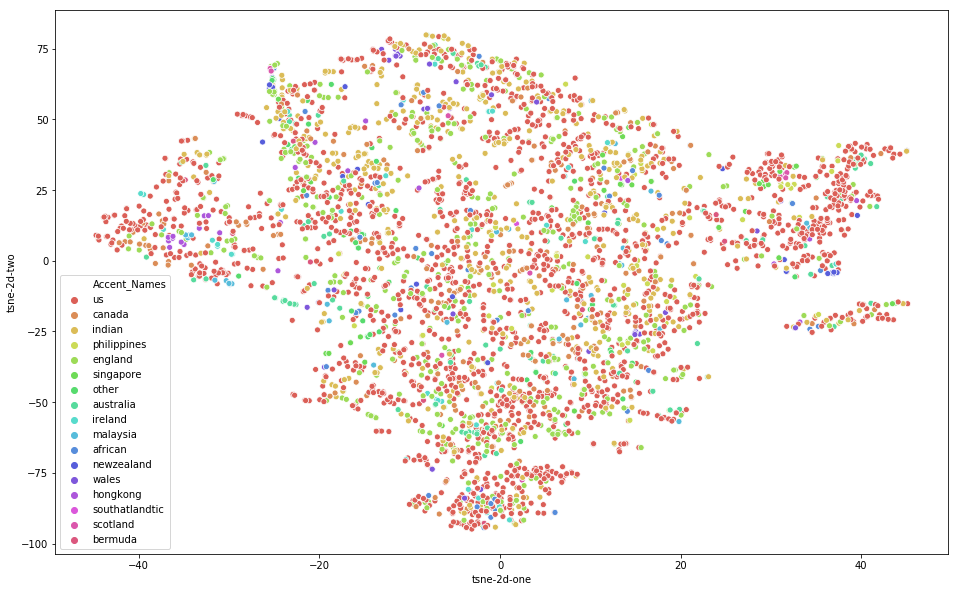

In [63]:
plt.figure(figsize=(16,10))
sns_p = sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='Accent_Names',
    palette=sns.color_palette("hls", 17),
    data=df,
    legend="full",
    alpha=1
)

In [68]:
fig = sns_p.get_figure()
fig.savefig('figs/accent_dev_set.png',dpi=1200)

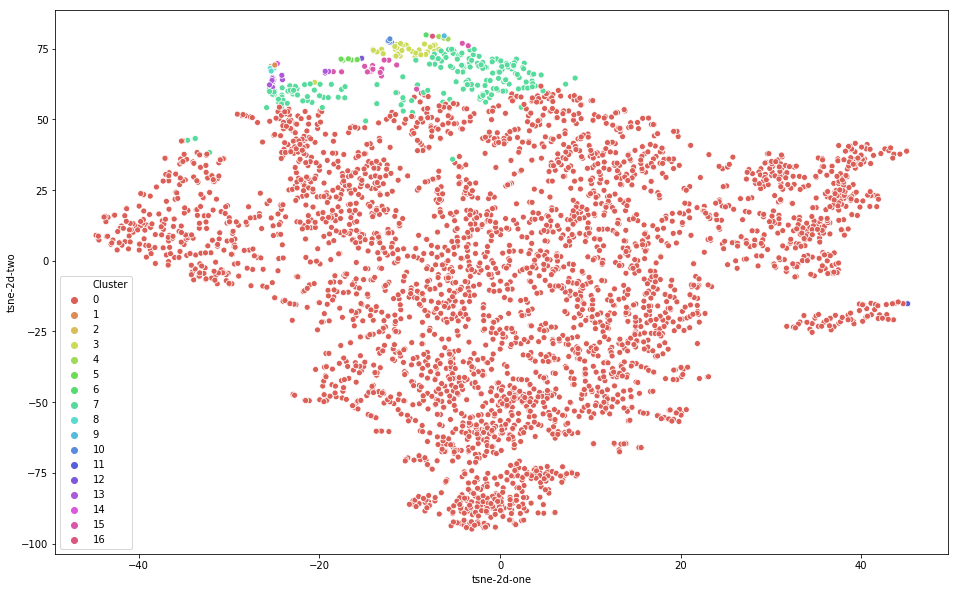

In [69]:
plt.figure(figsize=(16,10))
sns_c = sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='Cluster',
    palette=sns.color_palette("hls", 17),
    data=df,
    legend="full",
    alpha=1
)

In [70]:
fig_c = sns_c.get_figure()
fig_c.savefig('figs/cluster_accent_dev_set.png',dpi=1200)